## Task 3- Unsupervised Machine learning on Iris Dataset

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [24]:
data = pd.read_csv("iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:

data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [26]:
X = data.iloc[:,[1,2,3,4]].values
y = data.iloc[:,-1].values


In [27]:
#For K means clustering we need to find the value of K first. which we can find by elbow method.

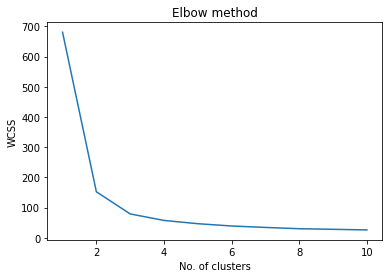

In [55]:
from sklearn.cluster import KMeans
wcss = []  #within clusture sum of square 
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,n_init=10,random_state=0,max_iter=500)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
#plotting
plt.plot(range(1,11),wcss);
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")
plt.title("Elbow method")
plt.show()

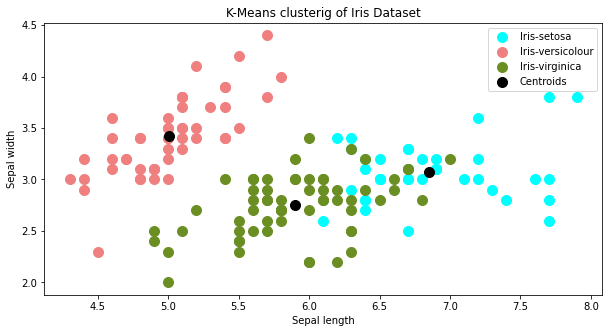

In [57]:
#We can choose K=3 as it best fit on the data
Kmeans = KMeans(n_clusters=3,random_state=0,n_init=10,max_iter=500)
pred =Kmeans.fit_predict(X)


#plotting clusters
plt.figure(figsize=(10,5))
plt.scatter(X[pred==0,0],X[pred==0,1],s=100,
            label = 'Iris-setosa',color ='aqua' );
plt.scatter(X[pred==1,0],X[pred==1,1],s=100,
            label = 'Iris-versicolour',color='lightcoral');
plt.scatter(X[pred==2,0],X[pred==2,1],s=100,
            label = 'Iris-virginica',color='olivedrab');

#plotting centroids
plt.scatter(Kmeans.cluster_centers_[:,0], Kmeans.cluster_centers_[:,1],
            s = 100, c = 'black', label = 'Centroids');
plt.title("K-Means clusterig of Iris Dataset")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.legend();